In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/TSLA.csv')
df.tail()

,Date,Close
505,7/6/2020,1371.579956
506,7/7/2020,1389.859985
507,7/8/2020,1365.880005
508,7/9/2020,1394.280029
509,7/10/2020,1544.650024


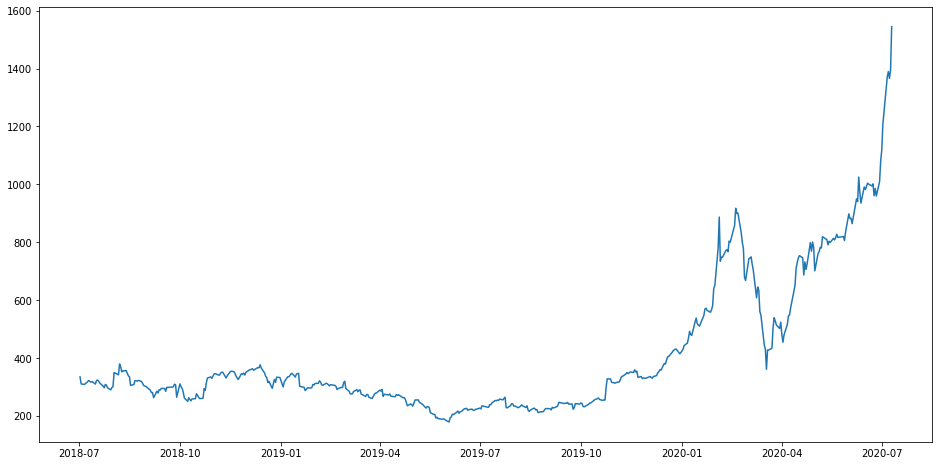

In [3]:
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [5]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset.values

In [6]:
train_data=final_dataset[0:370,:]
valid_data=final_dataset[370:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(train_data)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [7]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
10/10 - 1s - loss: 0.0764
Epoch 2/5
10/10 - 1s - loss: 0.0187
Epoch 3/5
10/10 - 1s - loss: 0.0135
Epoch 4/5
10/10 - 1s - loss: 0.0119
Epoch 5/5
10/10 - 1s - loss: 0.0104


In [8]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [9]:
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [11]:
lstm_model.save("../models/TSLA_model.h5")

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


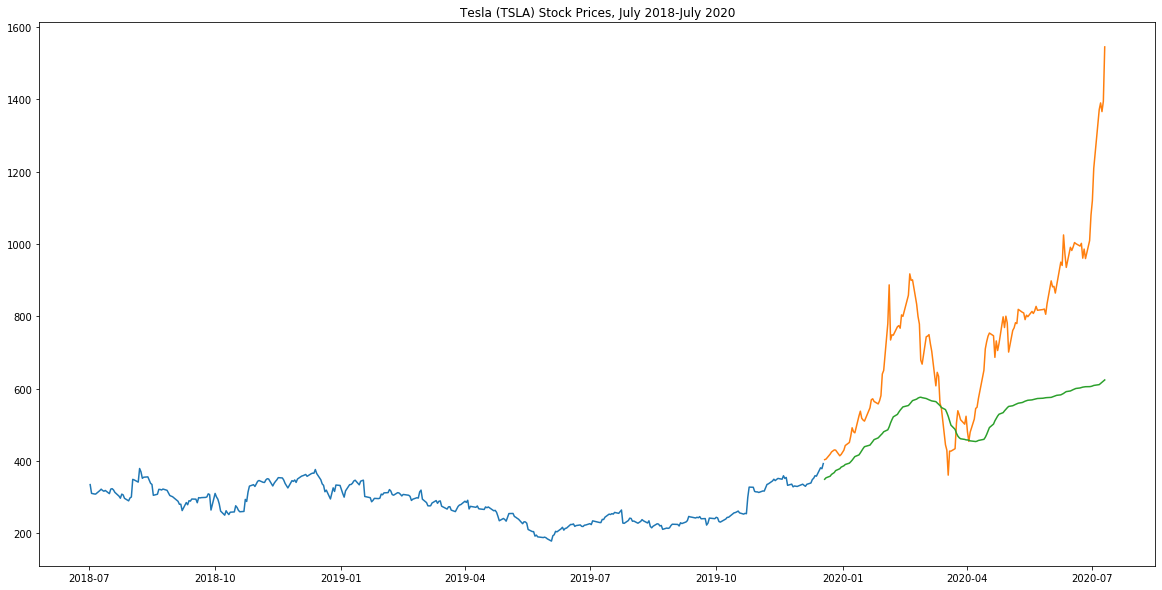

In [12]:
train_data=new_dataset[:370]
valid_data=new_dataset[370:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])
plt.title("Tesla (TSLA) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/TSLA_chart.png")

In [ ]:
# https://ucsd.bootcampcontent.com/UCSD-Coding-Bootcamp/ucsd-sd-data-pt-01-2020-u-c/blob/master/01-Lesson-Plans/21-Machine-Learning/1/Activities/05-Ins_Multiple_Linear_Regression_Sklearn/Solved/Ins_Multiple_Linear_Regression_Sklearn.ipynb

predictions = lstm_model.predict(x_train_data)
# Plot Residuals
plt.scatter(predictions, predictions - y_train_data)
plt.hlines(y_train_data=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

# https://machinelearningmastery.com/visualize-time-series-residual-forecast-errors-with-python/